In [12]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
fits_data = astropy.io.fits.open('asu.fit')
ZCosmos = fits_data[1].data

In [14]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
ZCosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [15]:
Useful_columns_zcosmos_data = [ZCosmos_names[3], ZCosmos_names[5]]

In [16]:
print(Useful_columns_zcosmos_data)

['z', 'Imag']


In [17]:
z = Useful_columns_zcosmos_data[0]
ZCosmos_redshift = ZCosmos[z]
print(ZCosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [18]:
fits_data2 = astropy.io.fits.open('asu2.fit')
Cosmos = fits_data2[1].data

In [19]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
Cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'e_imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [20]:
Useful_columns_cosmos_range = list(range(5, 15)) + [16]
Useful_columns_cosmos_data = [Cosmos_names[i] for i in Useful_columns_cosmos_range]
print(Useful_columns_cosmos_data)

['n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'e_imag', 'zmag', 'Kmag', 'zphot']


In [21]:
Zphot = Useful_columns_cosmos_data[10]
Cosmos_redshift = Cosmos[Zphot]
print(Cosmos_redshift)

[ 1.34  0.76  0.4  ...,  0.08  1.5   1.57]


In [31]:
df = pd.DataFrame(fits_data[1].data)
df.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


In [32]:
df = pd.DataFrame(fits_data2[1].data)
df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,e_imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,0.0540,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,0.0446,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,0.0364,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,0.0738,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,0.0424,23.5610,22.0594,23.8575,0.34


In [22]:
with open('cross_match2.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    all_lines = (line for line in csvreader)
    col_names = next(all_lines)
    n_cols = len(col_names)
    col_inds = range(n_cols)
    xmatch_data = [[pair[k] for k in col_inds] for pair in all_lines]
test_data = pd.DataFrame(xmatch_data, columns=col_names)
print(test_data['zCOSMOS'][:10])
print(test_data[1:2])
test_data[['zCOSMOS', 'COSMOS']].astype(int)

0    845680
1    824999
2    818595
3    848265
4    825318
5    846003
6    819527
7    818027
8    818065
9    811072
Name: zCOSMOS, dtype: object
    angDist   _RAJ2000 _DEJ2000   COSMOS    RAJ2000  DEJ2000 istar    imagA  \
1  0.149643  150.06939  2.27186  1603077  150.06939  2.27186  0.02  20.0348   

  n_imagA     Bmag ...  zphot    _RAJ2000  _DEJ2000 zCOSMOS     RAJ2000  \
1       1  22.1842 ...   0.22  150.069427  2.271879  824999  150.069427   

    DEJ2000       z CClass   Imag Mask  
1  2.271879  0.2164    4.5  21.32    1  

[1 rows x 25 columns]


,zCOSMOS,COSMOS
0,845680,2710778
1,824999,1603077
2,818595,1242468
3,848265,2833286
4,825318,1671285
5,846003,2710822
6,819527,1320926
7,818027,1242516
8,818065,1242517
9,811072,879829


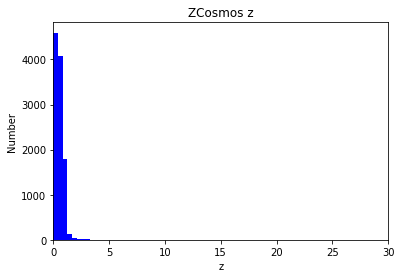

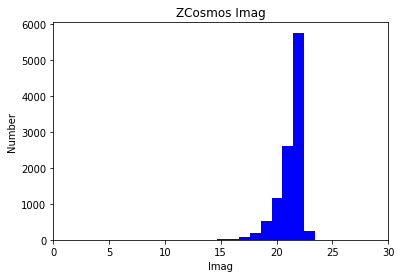

In [23]:
for i in Useful_columns_zcosmos_data:
    plt.hist(ZCosmos[i], color='blue', linewidth=5)
    plt.xlim(0, 30)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos" + " " + i)
    plt.savefig("ZCosmos" + " " + i + " " + "Plot.png")
    plt.show()

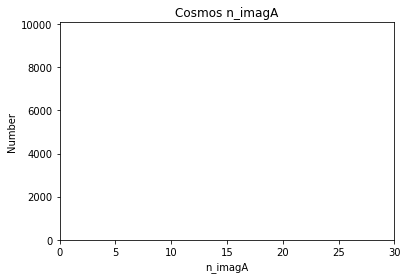

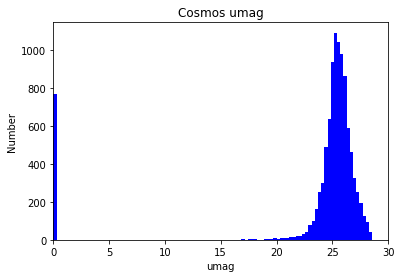

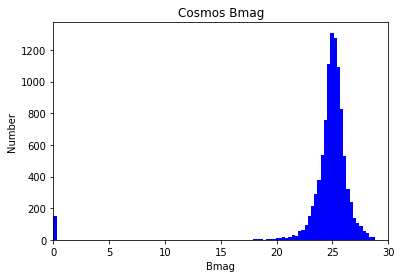

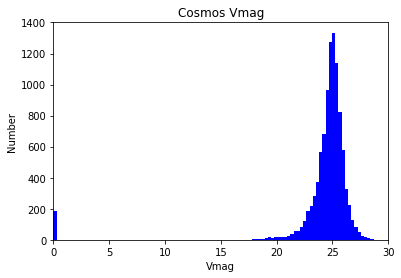

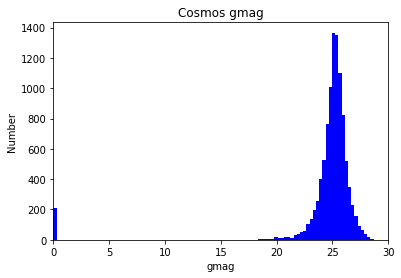

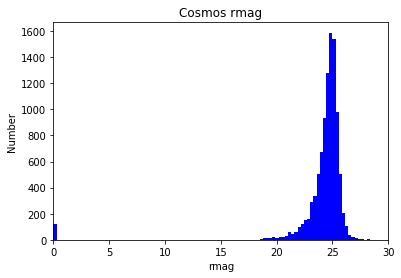

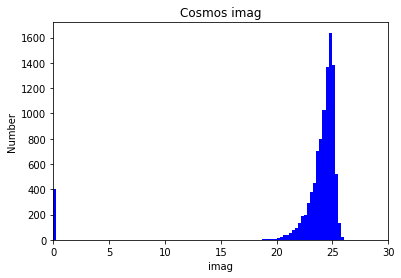

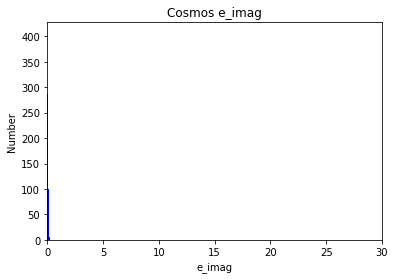

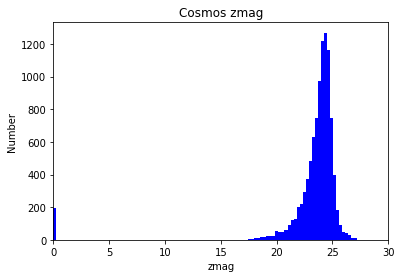

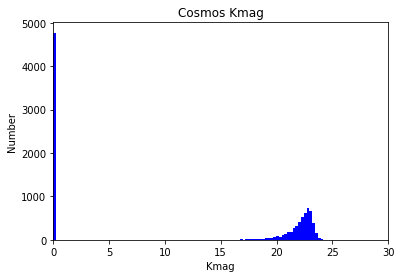

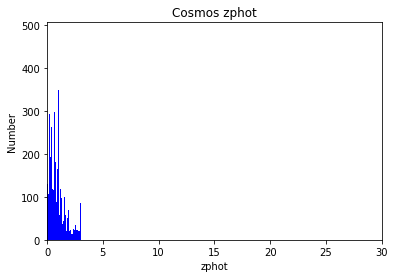

In [24]:
for i in Useful_columns_cosmos_data:
    import matplotlib.pyplot as plt
    plt.hist(Cosmos[i], color='blue', linewidth=5, bins=100)
    plt.xlim(0, 30)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos" + " " + i)
    plt.savefig("Cosmos" + " " + i + " " + "Plot.png")
    plt.show()

In [25]:
Cosmos_indices = [1,4,5,6,8]
Cosmos_bands = [Useful_columns_cosmos_data[index] for index in Cosmos_indices]

color = np.empty((4, len(Cosmos)))
for b in range(len(Cosmos_indices)-1):
    color[b] = np.array(Cosmos[Cosmos_bands[b]])-np.array(Cosmos[Cosmos_bands[b+1]])
    

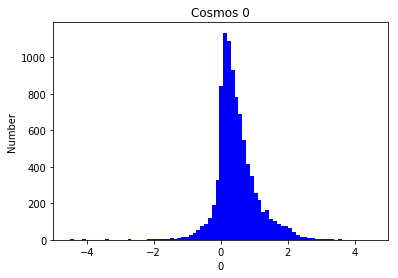

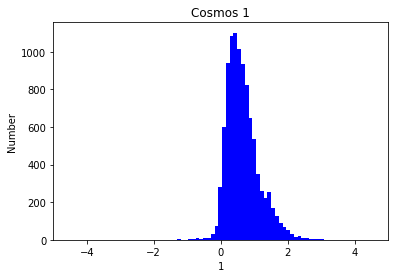

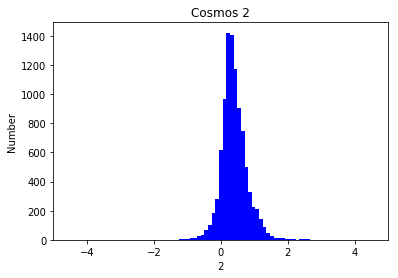

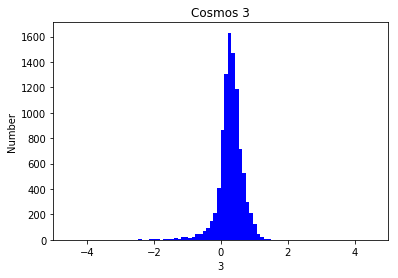

In [26]:
for i in range(len(Cosmos_bands)-1):
    import matplotlib.pyplot as plt
    plt.hist(color[i], color='blue', linewidth=5, bins=500)
    plt.xlim(-5, 5)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos" + " " + str(i))
    plt.savefig("Cosmos" + " " + str(i) + " " + "Plot.png")
    plt.show()

In [27]:
for i in range(len(bands)-2):
    plt.scatter(color[i], color[i+1], s=1, alpha=0.1)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()

NameError: name 'bands' is not defined

In [ ]:
for i in range(len(bands)-1):
    plt.scatter(Cosmos_redshift, color[i], s=1, alpha=0.1)
    plt.xlim(0,3)
    plt.ylim(-5,5)
    plt.show()

In [ ]:
ZCosmos_indices = [0,1]
ZCosmos_bands = [Useful_columns_zcosmos_data[index] for index in ZCosmos_indices]

color = np.empty((2, len(ZCosmos)))
for b in range(len(ZCosmos_indices)-1):
    color[b] = np.array(ZCosmos[ZCosmos_bands[b]])-np.array(ZCosmos[ZCosmos_bands[b+1]])

In [ ]:
for i in range(len(ZCosmos_bands)-1):
    import matplotlib.pyplot as plt
    plt.hist(color[i], color='blue', linewidth=5, bins=500)
    plt.xlim(-5, 5)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos" + " " + str(i))
    plt.savefig("ZCosmos" + " " + str(i) + " " + "Plot.png")
    plt.show()

In [ ]:
for i in range(len(ZCosmos_bands)-2):
    plt.scatter(color[i], color[i+1], s=1, alpha=0.1)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()

In [ ]:
for i in range(len(ZCosmos_bands)-1):
    plt.scatter(ZCosmos_redshift, color[i], s=1, alpha=0.1)
    plt.xlim(0,3)
    plt.ylim(-5,5)
    plt.show()